# EE511 Project 2 Q3

### Let M = 10. Simulate (uniform) sampling with replacement from the outcomes 0, 1, 2, 3, …, M‐1.

##### a. Generate a histogram of the outcomes.

In [46]:
import numpy as np 
import matplotlib.pyplot as plt
import random
from scipy.stats import chisquare
from scipy.stats import chi2

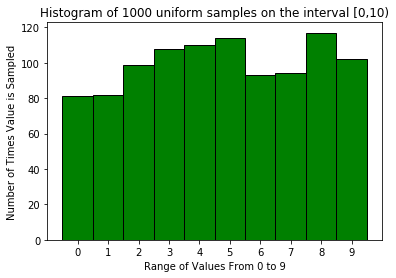

<Figure size 432x288 with 0 Axes>

In [52]:
M = 10
discrete_samples = [] 
for i in range(0,1000):
    discrete_samples.append(np.random.randint(0,M))

bins = np.arange(11)-.5

# editing and labeling histogram
plt.hist(discrete_samples, bins = bins, edgecolor = 'black', facecolor = 'green')
plt.xlabel("Range of Values From 0 to 9")
plt.xticks(range(10))
plt.ylabel("Number of Times Value is Sampled")
plt.title("Histogram of 1000 uniform samples on the interval [0,10)")
plt.show()
plt.savefig("value_int_1000.png")

- The code above randomly generates an integer from [0,10) and appends it to an array 1000 times, for 1000 samples.
- The histogram above shows the distribution of uniform randomly generated integers from [0,10) for 1000 samples
- Because of the large sampling value, the integers are almost equally distributed.

##### b. Perform a statistical goodness‐of‐fit test to conclude at the 95% confidence level if your data fits samples from a discrete uniform distribution 0, 1, 2, …, 9.

Chi squared test statistic is:  14.24
Chi squared test p-value is:  0.11404042177600558
The 95 percentile of chi squared distance with 9 degrees of freedom is: 16.918977604620448


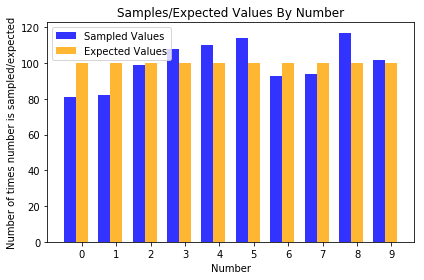

In [70]:

# this code counts the number of occurrences of each integer 
# and appends them all to an array
count_arr = []
expected_arr = [100,100,100,100,100,100,100,100,100,100] # we expect to see each integer 100 times in a uniform distribution 
for j in range(0,10):
    count_arr.append(discrete_samples.count(j))

chi_sq_res = chisquare(count_arr,expected_arr)
print('Chi squared test statistic is: ', str(chi_sq_res.statistic)) #generated the calculated chi squared value
print('Chi squared test p-value is: ', str(chi_sq_res.pvalue)) 
print('The 95 percentile of chi squared distance with',str(len(count_arr)-1),'degrees of freedom is:',str(chi2.ppf(0.95,len(count_arr)-1))) #generated the theoretical chi squared value at 95% percentile  
    
#print(count_arr)
# create plot
n_groups = 10
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, count_arr, bar_width,
alpha=opacity,
color='b',
label='Sampled Values')

rects2 = plt.bar(index + bar_width, expected_arr, bar_width,
alpha=opacity,
color='orange',
label='Expected Values')

plt.xlabel('Number')
plt.ylabel('Number of times number is sampled/expected')
plt.title('Samples/Expected Values By Number')
plt.xticks(index + bar_width, ('0','1', '2', '3', '4', '5','6','7','8','9'))
plt.legend()

plt.tight_layout()
plt.show()

- Based on the data from above, we can make the conclusion that the data we sampled is a good fit and from the assumed model. 
- The _X_<sup>2</sup> test statistic value we calculated is 14.24, which is less than the 95% percentile _X_<sup>2</sup> distance with nine degrees of freedom.  
- The CDF of the theoretical _X_<sup>2</sup> is 16.92, which means that the chance of the value drawn from a _X_<sup>2</sup> random variable is below 16.92 is 95%.
- Also, the _p_ value that was calculated is ~0.11, much greater than 0.05, and thus we can accept the null hypothesis that this data comes from the expected model. 
- The graph above also compares the sampled values to the expected values of every digit.

##### Repeat (b) to see if your data (the same data from b) instead fit an alternate uniform distribution 1, 2, 3, …, 10.

In [73]:
# this code counts the number of occurrences of each integer 
# and appends them all to an array
count_arr = []
expected_arr_10 = [100,100,100,100,100,100,100,100,100,0] 
# we expect to see each integer 100 times in a uniform distribution 
# except for the number 10, which should show up zero times since it 
# is not part of the sampling space of the original data
for j in range(0,10):
    count_arr.append(discrete_samples.count(j))

chi_sq_res = chisquare(count_arr,expected_arr_10)
print('Chi squared test statistic is: ', str(chi_sq_res.statistic)) #generated the calculated chi squared value
print('Chi squared test p-value is: ', str(chi_sq_res.pvalue)) 
print('The 95 percentile of chi squared distance with',str(len(count_arr)-1),'degrees of freedom is:',str(chi2.ppf(0.95,len(count_arr)-1))) #generated the theoretical chi squared value at 95% percentile  
    
#print(count_arr)
# create plot


Chi squared test statistic is:  inf
Chi squared test p-value is:  0.0
The 95 percentile of chi squared distance with 9 degrees of freedom is: 16.918977604620448


- From the results generated on this alternate uniform distirbution of 1,2, .., 10, it is clear that our sampled data is not a good fit to this distribution. 
- Intuitively, 10 is part of the new distribution, but not the sampling, so it will never been seen in the sampling data, making it not a good fit.
- Based on the _X_<sup>2</sup> goodness-of-fit test, a value of infinity was generated for the _X_<sup>2</sup> test statistic, and a 0 _p_ value was also generated. 
- From the 0 _p_ value, we can reject the null hypothesis, meaning that our sampled data does not fit this distribution
- From this goodness-of-fit test, there is a 95% chance that the value drawn from a _X_<sup>2</sup> random variable is below 16.92 is 95%, and our _X_<sup>2</sup> is infinity, another piece of evidence to state that it does not fit this distribution.